# Individual Algo Weak Scaling (Thread numbers on same plot) 

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sample_sort_mpi_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              1735292          2.494631   
                                                  2916813         44.932654   
                                                  18518990         0.297484   
                                                  19466114         5.093647   
                                                  81163840         6.882013   
                                                  93252456        19.817689   
                                                  94415284         2.896119   
                                                  97341737        42.253099   
                                                  110376527        0.055659   
                                                  120512663       54.336148   
                                                  130822727       47.643797   
                                                  132571558        0.476772   
                                                  135798515        2.387519   
                                                  154682660      266.736755   
                                                  158744347       35.568707   
                                                  166805621       33.820124   
                                                  190955046       11.399593   
                                                  199358056        1.974039   
                                                  202616412        5.590988   
                                                  212977515       35.561838   
                                                  228935524        1.086856   
                                                  241709788        0.218309   
                                                  274468628        0.255655   
                                                  338546642       33.508094   
                                                  344017165        3.618537   
                                                  349143071       34.927946   
                                                  365476483        0.733177   
                                                  383857579       33.661040   
                                                  400363707        0.281103   
                                                  400769906      236.702102   
                                                  404519659        4.472635   
                                                  444453520        2.748463   
                                                  454991035       41.143605   
                                                  465565920        7.036613   
                                                  485152607        4.105182   
                                                  496561508      250.662330   
                                                  500368337        0.587640   
                                                  510452497        1.842465   
                                                  554567779       22.097954   
                                                  554602542       10.661800   
                                                  562704291        0.239427   
                                                  566785762        0.117574   
                                                  570016264        0.249134   
                                                  635876369       39.762919   
                                                  648458368        0.283778   
                                                  648584791       14.363710   
                                                  656877182        1.399598   
                                                  690656929        6.740509   
                                                  695075506      227.153600   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     └─ 1.000 MPI_Gather
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
1735292              2.11.0-dev               8   
2916813              2.11.0-dev             512   
18518990             2.11.0-dev              32   
19466114             2.11.0-dev              16   
81163840             2.11.0-dev             256   
93252456             2.11.0-dev             256   
94415284             2.11.0-dev              32   
97341737             2.11.0-dev             512   
110376527            2.11.0-dev               2   
120512663            2.11.0-dev               4   
130822727            2.11.0-dev              64   
132571558            2.11.0-dev              16   
135798515            2.11.0-dev              16   
154682660            2.11.0-dev               2   
158744347            2.11.0-dev             512   
166805621            2.11.0-dev             512   
190955046            2.11.0-dev              64   
199358056            2.11.0-dev               2   
202616412            2.11.0-dev             128   
212977515            2.11.0-dev              32   
228935524            2.11.0-dev              32   
241709788            2.11.0-dev              16   
274468628            2.11.0-dev              64   
338546642            2.11.0-dev             512   
344017165            2.11.0-dev             128   
349143071            2.11.0-dev             512   
365476483            2.11.0-dev              32   
383857579            2.11.0-dev             512   
400363707            2.11.0-dev              64   
400769906            2.11.0-dev            1024   
404519659            2.11.0-dev              32   
444453520            2.11.0-dev               4   
454991035            2.11.0-dev              16   
465565920            2.11.0-dev             256   
485152607            2.11.0-dev              64   
496561508            2.11.0-dev            1024   
500368337            2.11.0-dev              64   
510452497            2.11.0-dev             128   
554567779            2.11.0-dev               4   
554602542            2.11.0-dev              32   
562704291            2.11.0-dev              64   
566785762            2.11.0-dev               4   
570016264            2.11.0-dev               8   
635876369            2.11.0-dev             512   
648458368            2.11.0-dev               2   
648584791            2.11.0-dev               2   
656877182            2.11.0-dev              16   
690656929            2.11.0-dev             256   
695075506            2.11.0-dev            1024   
720300068            2.11.0-dev              16   
730548031            2.11.0-dev               2   
740334444            2.11.0-dev               8   
746394895            2.11.0-dev              32   
749061779            2.11.0-dev            1024   
756868170            2.11.0-dev               4   
773597652            2.11.0-dev              64   
783482910            2.11.0-dev             512   
802165993            2.11.0-dev               4   
804698893            2.11.0-dev               8   
827263320            2.11.0-dev              16   
852930361            2.11.0-dev            1024   
859988027            2.11.0-dev             256   
861081225            2.11.0-dev               2   
869165960            2.11.0-dev            1024   
871694213            2.11.0-dev            1024   
879715497            2.11.0-dev             512   
899216769            2.11.0-dev             256   
905543418            2.11.0-dev              64   
963425917            2.11.0-dev             128   
970010150            2.11.0-dev             256   
980764931            2.11.0-dev               8   
985780102            2.11.0-dev             256   
987154844            2.11.0-dev            1024   
1000990651           2.11.0-dev              64   
1003582905           2.11.0-dev            1024   
1014709171           2.11.0-dev               2   
1030641782           2.11.0-dev  

In [6]:
gb = tk.groupby("InputType")
print(gb.keys())
allthickets = list(gb.values())
inputsorted = gb['sorted'].groupby("num_procs")
inputreversed = gb['reversed'].groupby("num_procs")
inputrandom = gb['random'].groupby("num_procs")
inputperturbed = gb['1 perturbed'].groupby("num_procs")

4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ac37a844310>, 'random': <thicket.thicket.Thicket object at 0x2ac37a9b2280>, 'reversed': <thicket.thicket.Thicket object at 0x2ac37a986070>, 'sorted': <thicket.thicket.Thicket object at 0x2ac37a9d2c70>}
dict_keys(['1 perturbed', 'random', 'reversed', 'sorted'])
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2ac37a9f3580>, 4: <thicket.thicket.Thicket object at 0x2ac37a891e50>, 8: <thicket.thicket.Thicket object at 0x2ac37a8917f0>, 16: <thicket.thicket.Thicket object at 0x2ac37a8f11f0>, 32: <thicket.thicket.Thicket object at 0x2ac37a8dcc40>, 64: <thicket.thicket.Thicket object at 0x2ac37a8f1250>, 128: <thicket.thicket.Thicket object at 0x2ac37a8eca00>, 256: <thicket.thicket.Thicket object at 0x2ac37a930760>, 512: <thicket.thicket.Thicket object at 0x2ac37ab1ee50>, 1024: <thicket.thicket.Thicket object at 0x2ac37ad14b80>}
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2ac37acddf

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctksorted = th.Thicket.concat_thickets(
    thickets=list(inputsorted.values()),
    headers=list(inputsorted.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkreversed = th.Thicket.concat_thickets(
    thickets=list(inputreversed.values()),
    headers=list(inputreversed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkperturbed = th.Thicket.concat_thickets(
    thickets=list(inputperturbed.values()),
    headers=list(inputperturbed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkrandom = th.Thicket.concat_thickets(
    thickets=list(inputrandom.values()),
    headers=list(inputrandom.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctksorted)
allctk.append(ctkreversed)
allctk.append(ctkperturbed)
allctk.append(ctkrandom)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.012070   
                                                  262144         0.055659   
                                                  1048576        0.199663   
                                                  4194304        0.838279   
                                                  16777216       3.547760   
                                                  67108864      14.977219   
                                                  167772216           NaN   
                                                  268435456     63.547147   
{'name': 'comm', 'type': 'function'}              65536          0.000406   
                                                  262144         0.004548   
                                                  1048576        0.001524   
                                                  4194304        0.003188   
                                                  16777216       0.005742   
                                                  67108864       0.021363   
                                                  167772216           NaN   
                                                  268435456      0.089604   
{'name': 'comm_large', 'type': 'function'}        65536          0.000141   
                                                  262144         0.001360   
                                                  1048576        0.000952   
                                                  4194304        0.002999   
                                                  16777216       0.005562   
                                                  67108864       0.021185   
                                                  167772216           NaN   
                                                  268435456      0.089415   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000034   
                                                  262144         0.000581   
                                                  1048576        0.000606   
                                                  4194304        0.000034   
                                                  16777216       0.000032   
                                                  67108864       0.000034   
                                                  167772216           NaN   
                                                  268435456      0.000078   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000029   
                                                  262144         0.000230   
                                                  1048576        0.000026   
                                                  4194304        0.000033   
                                                  16777216       0.000036   
                                                  67108864       0.000041   
                                                  167772216           NaN   
                                                  268435456      0.000061   
{'name': 'comm_small', 'type': 'function'}        65536          0.000222   
                                                  262144         0.003119   
                                                  1048576        0.000130   
                                                  4194304        0.000146   
                                                  16777216       0.000137   
                                                  67108864       0.000131   
                                                  167772216           NaN   
                                                  268435456      0.000139   
{'name': 'MPI_Bcast', 'type': 'function'}         65536          0.000035   
                                                  262144         0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.039258   
                                                  262144         0.172553   
                                                  1048576        0.763914   
                                                  4194304        3.319504   
                                                  16777216      14.363710   
                                                  67108864      62.069174   
                                                  167772216           NaN   
                                                  268435456    266.736755   
{'name': 'comm', 'type': 'function'}              65536          0.000350   
                                                  262144         0.000676   
                                                  1048576        0.006908   
                                                  4194304        0.011116   
                                                  16777216       0.033148   
                                                  67108864       0.121607   
                                                  167772216           NaN   
                                                  268435456      0.484781   
{'name': 'comm_large', 'type': 'function'}        65536          0.000182   
                                                  262144         0.000512   
                                                  1048576        0.003647   
                                                  4194304        0.010886   
                                                  16777216       0.032960   
                                                  67108864       0.121361   
                                                  167772216           NaN   
                                                  268435456      0.484541   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000085   
                                                  262144         0.000242   
                                                  1048576        0.002803   
                                                  4194304        0.007779   
                                                  16777216       0.022748   
                                                  67108864       0.080876   
                                                  167772216           NaN   
                                                  268435456      0.297378   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000071   
                                                  262144         0.000206   
                                                  1048576        0.000732   
                                                  4194304        0.002832   
                                                  16777216       0.005541   
                                                  67108864       0.020800   
                                                  167772216           NaN   
                                                  268435456      0.090667   
{'name': 'comm_small', 'type': 'function'}        65536          0.000132   
                                                  262144         0.000127   
                                                  1048576        0.002872   
                                                  4194304        0.000167   
                                                  16777216       0.000124   
                                                  67108864       0.000172   
                                                  167772216           NaN   
                                                  268435456      0.000159   
{'name': 'MPI_Bcast', 'type': 'function'}         65536          0.000023   
                                                  262144         0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.022131   
                                                  262144         0.113591   
                                                  1048576        0.393219   
                                                  4194304        1.569108   
                                                  16777216       7.819976   
                                                  67108864      29.672218   
                                                  167772216           NaN   
                                                  268435456    128.422151   
{'name': 'comm', 'type': 'function'}              65536          0.000286   
                                                  262144         0.000833   
                                                  1048576        0.000981   
                                                  4194304        0.003256   
                                                  16777216       0.005416   
                                                  67108864       0.025328   
                                                  167772216           NaN   
                                                  268435456      0.089861   
{'name': 'comm_large', 'type': 'function'}        65536          0.000114   
                                                  262144         0.000354   
                                                  1048576        0.000809   
                                                  4194304        0.003069   
                                                  16777216       0.005231   
                                                  67108864       0.025115   
                                                  167772216           NaN   
                                                  268435456      0.089642   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000025   
                                                  262144         0.000134   
                                                  1048576        0.000040   
                                                  4194304        0.000045   
                                                  16777216       0.000068   
                                                  67108864       0.000448   
                                                  167772216           NaN   
                                                  268435456      0.001119   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000019   
                                                  262144         0.000026   
                                                  1048576        0.000038   
                                                  4194304        0.000056   
                                                  16777216       0.000099   
                                                  67108864       0.000341   
                                                  167772216           NaN   
                                                  268435456      0.000930   
{'name': 'comm_small', 'type': 'function'}        65536          0.000135   
                                                  262144         0.000438   
                                                  1048576        0.000130   
                                                  4194304        0.000143   
                                                  16777216       0.000139   
                                                  67108864       0.000157   
                                                  167772216           NaN   
                                                  268435456      0.000166   
{'name': 'MPI_Bcast', 'type': 'function'}         65536          0.000023   
                                                  262144         0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.024919   
                                                  262144         0.105585   
                                                  1048576        0.283778   
                                                  4194304        1.974039   
                                                  16777216       5.337221   
                                                  67108864      37.007472   
                                                  268435456     93.469508   
{'name': 'comm', 'type': 'function'}              65536          0.000315   
                                                  262144         0.000587   
                                                  1048576        0.001306   
                                                  4194304        0.004644   
                                                  16777216       0.011947   
                                                  67108864       0.043419   
                                                  268435456      0.207023   
{'name': 'comm_large', 'type': 'function'}        65536          0.000137   
                                                  262144         0.000413   
                                                  1048576        0.001143   
                                                  4194304        0.004083   
                                                  16777216       0.011742   
                                                  67108864       0.043196   
                                                  268435456      0.206756   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000028   
                                                  262144         0.000076   
                                                  1048576        0.000790   
                                                  4194304        0.003739   
                                                  16777216       0.006046   
                                                  67108864       0.004995   
                                                  268435456      0.138732   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000027   
                                                  262144         0.000059   
                                                  1048576        0.000326   
                                                  4194304        0.000316   
                                                  16777216       0.004931   
                                                  67108864       0.004868   
                                                  268435456      0.067965   
{'name': 'comm_small', 'type': 'function'}        65536          0.000144   
                                                  262144         0.000137   
                                                  1048576        0.000122   
                                                  4194304        0.000516   
                                                  16777216       0.000150   
                                                  67108864       0.000169   
                                                  268435456      0.000210   
{'name': 'MPI_Bcast', 'type': 'function'}         65536          0.000022   
                                                  262144         0.000026   
                                                  1048576        0.000022   
                                                  4194304        0.000406   
                                                  16777216       0.000027   
                                                  67108864       0.000064   
                                                  268435456      0.000072   
{'name': 'MPI_Gather', 'type': 'function'}        65536          0.0

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.012070      0.012071      0.012070   
                  262144         0.055659      0.055679      0.055669   
                  1048576        0.199663      0.200366      0.200015   
                  4194304        0.838279      0.838453      0.838366   
                  16777216       3.547760      3.547917      3.547839   
                  67108864      14.977219     14.977576     14.977397   
                  167772216           NaN           NaN           NaN   
                  268435456     63.547147     63.548221     63.547684   
comm              65536          0.000406      0.000604      0.000505   
                  262144         0.004548      0.005602      0.005075   
                  1048576        0.001524      0.002507      0.002015   
                  4194304        0.003188      0.006257      0.004722   
                  16777216       0.005742      0.013851      0.009797   
                  67108864       0.021363      0.050037      0.035700   
                  167772216           NaN           NaN           NaN   
                  268435456      0.089604      0.195254      0.142429   
comm_large        65536          0.000141      0.000166      0.000153   
                  262144         0.001360      0.001456      0.001408   
                  1048576        0.000952      0.001352      0.001152   
                  4194304        0.002999      0.005953      0.004476   
                  16777216       0.005562      0.013233      0.009397   
                  67108864       0.021185      0.049779      0.035482   
                  167772216           NaN           NaN           NaN   
                  268435456      0.089415      0.194945      0.142180   
MPI_Recv          65536          0.000034      0.000111      0.000073   
                  262144         0.000581      0.001100      0.000841   
                  1048576        0.000606      0.000903      0.000755   
                  4194304        0.000034      0.005890      0.002962   
                  16777216       0.000032      0.013162      0.006597   
                  67108864       0.000034      0.049703      0.024868   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000078      0.194834      0.097456   
MPI_Send          65536          0.000029      0.000080      0.000054   
                  262144         0.000230      0.000841      0.000535   
                  1048576        0.000026      0.000717      0.000371   
                  4194304        0.000033      0.002937      0.001485   
                  16777216       0.000036      0.005494      0.002765   
                  67108864       0.000041      0.021111      0.010576   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000061      0.089289      0.044675   
comm_small        65536          0.000222      0.000395      0.000309   
                  262144         0.003119      0.004077      0.003598   
                  1048576        0.000130      0.001519      0.000824   
                  4194304        0.000146      0.000261      0.000204   
                  16777216       0.000137      0.000576      0.000357   
                  67108864       0.000131      0.000212      0.000171   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000139      0.000249      0.000194   
MPI_Bcast         65536          0.000035      0.000058      0.000047   
                  262144         0.000349      0.000355      0.000352   
                  1048576        0.000024      0.000026      0.000025   
                  4194304        0.000022      0.000024      0.000023   
                  1677721

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.039258      0.039263      0.039261   
                  262144         0.172553      0.172648      0.172601   
                  1048576        0.763914      0.763963      0.763939   
                  4194304        3.319504      3.319546      3.319525   
                  16777216      14.363710     14.363909     14.363810   
                  67108864      62.069174     62.069358     62.069266   
                  167772216           NaN           NaN           NaN   
                  268435456    266.736755    266.737744    266.737249   
comm              65536          0.000350      0.000742      0.000546   
                  262144         0.000676      0.002129      0.001403   
                  1048576        0.006908      0.010241      0.008575   
                  4194304        0.011116      0.028960      0.020038   
                  16777216       0.033148      0.104446      0.068797   
                  67108864       0.121607      0.406484      0.264045   
                  167772216           NaN           NaN           NaN   
                  268435456      0.484781      1.633434      1.059107   
comm_large        65536          0.000182      0.000521      0.000352   
                  262144         0.000512      0.001912      0.001212   
                  1048576        0.003647      0.007329      0.005488   
                  4194304        0.010886      0.028695      0.019790   
                  16777216       0.032960      0.104193      0.068577   
                  67108864       0.121361      0.406153      0.263757   
                  167772216           NaN           NaN           NaN   
                  268435456      0.484541      1.632251      1.058396   
MPI_Recv          65536          0.000085      0.000427      0.000256   
                  262144         0.000242      0.001682      0.000962   
                  1048576        0.002803      0.006571      0.004687   
                  4194304        0.007779      0.025825      0.016802   
                  16777216       0.022748      0.098605      0.060677   
                  67108864       0.080876      0.385295      0.233085   
                  167772216           NaN           NaN           NaN   
                  268435456      0.297378      1.541510      0.919444   
MPI_Send          65536          0.000071      0.000075      0.000073   
                  262144         0.000206      0.000242      0.000224   
                  1048576        0.000732      0.000817      0.000775   
                  4194304        0.002832      0.003057      0.002944   
                  16777216       0.005541      0.010164      0.007852   
                  67108864       0.020800      0.040420      0.030610   
                  167772216           NaN           NaN           NaN   
                  268435456      0.090667      0.187098      0.138883   
comm_small        65536          0.000132      0.000187      0.000159   
                  262144         0.000127      0.000183      0.000155   
                  1048576        0.002872      0.003218      0.003045   
                  4194304        0.000167      0.000217      0.000192   
                  16777216       0.000124      0.000205      0.000165   
                  67108864       0.000172      0.000278      0.000225   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000159      0.001132      0.000645   
MPI_Bcast         65536          0.000023      0.000024      0.000023   
                  262144         0.000022      0.000022      0.000022   
                  1048576        0.001010      0.001015      0.001013   
                  4194304        0.000031      0.000045      0.000038   
                  1677721

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.022131      0.022141      0.022136   
                  262144         0.113591      0.113776      0.113684   
                  1048576        0.393219      0.393221      0.393220   
                  4194304        1.569108      1.569338      1.569223   
                  16777216       7.819976      7.820365      7.820171   
                  67108864      29.672218     29.672376     29.672297   
                  167772216           NaN           NaN           NaN   
                  268435456    128.422151    128.423182    128.422666   
comm              65536          0.000286      0.001085      0.000686   
                  262144         0.000833      0.002280      0.001557   
                  1048576        0.000981      0.002040      0.001510   
                  4194304        0.003256      0.008572      0.005914   
                  16777216       0.005416      0.017321      0.011368   
                  67108864       0.025328      0.088811      0.057070   
                  167772216           NaN           NaN           NaN   
                  268435456      0.089861      0.314316      0.202088   
comm_large        65536          0.000114      0.000142      0.000128   
                  262144         0.000354      0.000668      0.000511   
                  1048576        0.000809      0.001814      0.001312   
                  4194304        0.003069      0.008265      0.005667   
                  16777216       0.005231      0.017052      0.011141   
                  67108864       0.025115      0.086734      0.055925   
                  167772216           NaN           NaN           NaN   
                  268435456      0.089642      0.312572      0.201107   
MPI_Recv          65536          0.000025      0.000106      0.000065   
                  262144         0.000134      0.000617      0.000375   
                  1048576        0.000040      0.001746      0.000893   
                  4194304        0.000045      0.008177      0.004111   
                  16777216       0.000068      0.016911      0.008489   
                  67108864       0.000448      0.086342      0.043395   
                  167772216           NaN           NaN           NaN   
                  268435456      0.001119      0.311591      0.156355   
MPI_Send          65536          0.000019      0.000072      0.000045   
                  262144         0.000026      0.000200      0.000113   
                  1048576        0.000038      0.000743      0.000391   
                  4194304        0.000056      0.002995      0.001526   
                  16777216       0.000099      0.005126      0.002613   
                  67108864       0.000341      0.024607      0.012474   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000930      0.088467      0.044699   
comm_small        65536          0.000135      0.000909      0.000522   
                  262144         0.000438      0.001575      0.001006   
                  1048576        0.000130      0.000187      0.000158   
                  4194304        0.000143      0.000267      0.000205   
                  16777216       0.000139      0.000222      0.000180   
                  67108864       0.000157      0.002028      0.001092   
                  167772216           NaN           NaN           NaN   
                  268435456      0.000166      0.001694      0.000930   
MPI_Bcast         65536          0.000023      0.000025      0.000024   
                  262144         0.000024      0.000029      0.000026   
                  1048576        0.000023      0.000024      0.000023   
                  4194304        0.000023      0.000027      0.000025   
                  1677721

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.024919      0.024930      0.024925   
                  262144         0.105585      0.105678      0.105632   
                  1048576        0.283778      0.283846      0.283812   
                  4194304        1.974039      1.974946      1.974492   
                  16777216       5.337221      5.337837      5.337529   
                  67108864      37.007472     37.009289     37.008380   
                  268435456     93.469508     93.470093     93.469800   
comm              65536          0.000315      0.000497      0.000406   
                  262144         0.000587      0.000971      0.000779   
                  1048576        0.001306      0.006232      0.003769   
                  4194304        0.004644      0.039075      0.021860   
                  16777216       0.011947      0.081280      0.046614   
                  67108864       0.043419      0.107807      0.075613   
                  268435456      0.207023      1.577354      0.892188   
comm_large        65536          0.000137      0.000226      0.000182   
                  262144         0.000413      0.000709      0.000561   
                  1048576        0.001143      0.006030      0.003586   
                  4194304        0.004083      0.038244      0.021164   
                  16777216       0.011742      0.080974      0.046358   
                  67108864       0.043196      0.103408      0.073302   
                  268435456      0.206756      1.576997      0.891877   
MPI_Recv          65536          0.000028      0.000181      0.000104   
                  262144         0.000076      0.000628      0.000352   
                  1048576        0.000790      0.005340      0.003065   
                  4194304        0.003739      0.035945      0.019842   
                  16777216       0.006046      0.076001      0.041023   
                  67108864       0.004995      0.098493      0.051744   
                  268435456      0.138732      1.485449      0.812090   
MPI_Send          65536          0.000027      0.000091      0.000059   
                  262144         0.000059      0.000315      0.000187   
                  1048576        0.000326      0.000665      0.000496   
                  4194304        0.000316      0.002273      0.001294   
                  16777216       0.004931      0.005649      0.005290   
                  67108864       0.004868      0.038156      0.021512   
                  268435456      0.067965      0.091491      0.079728   
comm_small        65536          0.000144      0.000238      0.000191   
                  262144         0.000137      0.000226      0.000181   
                  1048576        0.000122      0.000164      0.000143   
                  4194304        0.000516      0.000795      0.000656   
                  16777216       0.000150      0.000261      0.000206   
                  67108864       0.000169      0.004356      0.002262   
                  268435456      0.000210      0.000315      0.000262   
MPI_Bcast         65536          0.000022      0.000037      0.000030   
                  262144         0.000026      0.000028      0.000027   
                  1048576        0.000022      0.000025      0.000024   
                  4194304        0.000406      0.000411      0.000408   
                  16777216       0.000027      0.000038      0.000032   
                  67108864       0.000064      0.000064      0.000064   
                  268435456      0.000072      0.000074      0.000073   
MPI_Gather        65536          0.000087      0.000194      0.000140   
                  262144         0.000091      0.000177      0.000134   
                  1048576        0.000081      0.000119      0.000100   
                  4194304

In [11]:
# Define common variables
sizes = sorted(list(set(allctk[0].dataframe.index.get_level_values("InputSize"))))
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

In [12]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [(   2,      'Min time/rank'),
            (   2,      'Max time/rank'),
            (   2, 'Variance time/rank'),
            (   4,      'Min time/rank'),
            (   4,      'Max time/rank'),
            (   4, 'Variance time/rank'),
            (   8,      'Min time/rank'),
            (   8,      'Max time/rank'),
            (   8, 'Variance time/rank'),
            (  16,      'Min time/rank'),
            (  16,      'Max time/rank'),
            (  16, 'Variance time/rank'),
            (  32,      'Min time/rank'),
            (  32,      'Max time/rank'),
            (  32, 'Variance time/rank'),
            (  64,      'Min time/rank'),
            (  64,      'Max time/rank'),
            (  64, 'Variance time/rank'),
            ( 128,      'Min time/rank'),
            ( 128,      'Max time/rank'),
            ( 128, 'Variance time/rank'),
            ( 256,      'Min time/rank'),
            ( 256,      'Max time/rank'),
            ( 256, 'Variance time/rank'),
            ( 512,      'Min time/rank'),
            ( 512,      'Max time/rank'),
            ( 512, 'Variance time/rank'),
            (1024,      'Min time/rank'),
            (1024,      'Max time/rank'),
            (1024, 'Variance time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )
[(2, 'Avg time/rank'), (4, 'Avg time/rank'), (8, 'Avg time/rank'), (16, 'Avg time/rank'), (32, 'Avg time/rank'), (64, 'Avg time/rank'), (128, 'Avg time/rank'), (256, 'Avg time/rank'), (512, 'Avg time/rank'), (1024, 'Avg time/rank')]


In [13]:
for ctk in allctk:
    display(ctk.metadata)

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            2.0   
262144              2.11.0-dev            2.0   
1048576             2.11.0-dev            2.0   
4194304             2.11.0-dev            2.0   
16777216            2.11.0-dev            2.0   
67108864            2.11.0-dev            2.0   
268435456           2.11.0-dev            2.0   
167772216                  NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   
167772216                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                                          2.0   
67108864                                          2.0   
268435456                                         2.0   
167772216                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   
167772216                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-0-sample.cali               true   
262144               true     262144-2-0-sample.cali               true   
1048576              true    1048576-2-0-sample.cali               true   
4194304              true    4194304-2-0-sample.cali               true   
16777216             true   16777216-2-0-sample.cali               true   
67108864             true   67108864-2-0-sample.cali               true   
268435456            true  268435456-2-0-sample.cali               true   
167772216             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1.700075e+09  [/scratch/group/cs

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            2.0   
262144              2.11.0-dev            2.0   
1048576             2.11.0-dev            2.0   
4194304             2.11.0-dev            2.0   
16777216            2.11.0-dev            2.0   
67108864            2.11.0-dev            2.0   
268435456           2.11.0-dev            2.0   
167772216                  NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   
167772216                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                                          2.0   
67108864                                          2.0   
268435456                                         2.0   
167772216                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   
167772216                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-1-sample.cali               true   
262144               true     262144-2-1-sample.cali               true   
1048576              true    1048576-2-1-sample.cali               true   
4194304              true    4194304-2-1-sample.cali               true   
16777216             true   16777216-2-1-sample.cali               true   
67108864             true   67108864-2-1-sample.cali               true   
268435456            true  268435456-2-1-sample.cali               true   
167772216             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1.700075e+09  [/scratch/group/cs

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            2.0   
262144              2.11.0-dev            2.0   
1048576             2.11.0-dev            2.0   
4194304             2.11.0-dev            2.0   
16777216            2.11.0-dev            2.0   
67108864            2.11.0-dev            2.0   
268435456           2.11.0-dev            2.0   
167772216                  NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   
167772216                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                                          2.0   
67108864                                          2.0   
268435456                                         2.0   
167772216                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   
167772216                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-2-sample.cali               true   
262144               true     262144-2-2-sample.cali               true   
1048576              true    1048576-2-2-sample.cali               true   
4194304              true    4194304-2-2-sample.cali               true   
16777216             true   16777216-2-2-sample.cali               true   
67108864             true   67108864-2-2-sample.cali               true   
268435456            true  268435456-2-2-sample.cali               true   
167772216             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1.700075e+09  [/scratch/group/cs

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-3-sample.cali               true   
262144               true     262144-2-3-sample.cali               true   
1048576              true    1048576-2-3-sample.cali               true   
4194304              true    4194304-2-3-sample.cali               true   
16777216             true   16777216-2-3-sample.cali               true   
67108864             true   67108864-2-3-sample.cali               true   
268435456            true  268435456-2-3-sample.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103780  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103792  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700103816  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700103844  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700103873  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700103896  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700103914  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                               \
                                 cmdline cluster    Algorithm   
InputSize 

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [16]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [17]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

In [19]:
def plot_mpl_numprocs(df,df1, df2, df3, df4, df5, df6, df7, df8, df9, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7, label8, label9, label10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot(df7, marker='3', label=label8)
    ax.plot(df8, marker='4', label=label9)
    ax.plot(df9, marker='8', label=label10)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [20]:
threads = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
sorttypes = [('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )


In [21]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']
                                        2             4             8  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.012070      0.014150      0.079920   
                  262144         0.055669      0.027228      0.122704   
                  1048576        0.200015      0.089087      0.142692   
                  4194304        0.838366      0.337226      0.389192   
                  16777216       3.547839      1.406039      1.465791   
                  67108864      14.977397      5.895717      5.822343   
                  167772216           NaN           NaN           NaN   
                  268435456     63.547684     25.045093     24.517063   
comm              65536        

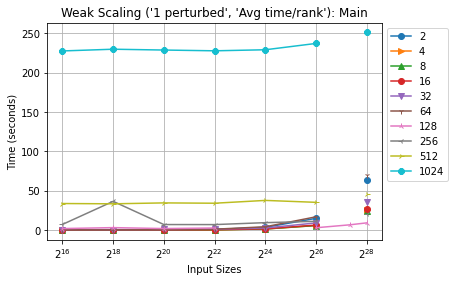

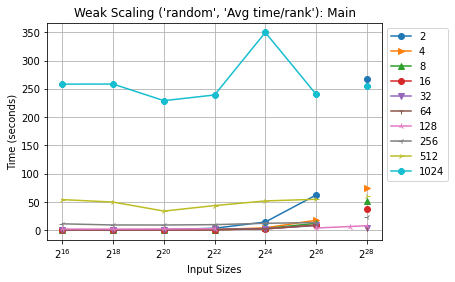

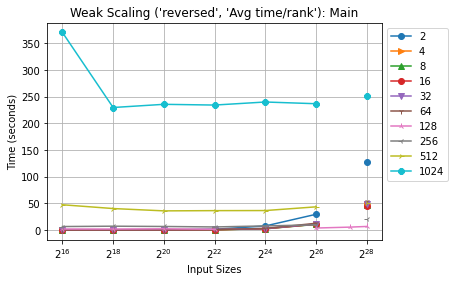

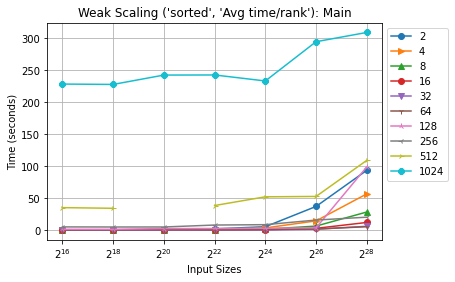

In [22]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["main"],
        df1= ctk.dataframe[[threads[1]]].loc["main"],
        df2= ctk.dataframe[[threads[2]]].loc["main"],
        df3= ctk.dataframe[[threads[3]]].loc["main"],
        df4= ctk.dataframe[[threads[4]]].loc["main"],
        df5= ctk.dataframe[[threads[5]]].loc["main"],
        df6= ctk.dataframe[[threads[6]]].loc["main"],
        df7= ctk.dataframe[[threads[7]]].loc["main"],
        df8= ctk.dataframe[[threads[8]]].loc["main"],
        df9= ctk.dataframe[[threads[9]]].loc["main"],
        title=f"Weak Scaling {sorttypes[i]}: Main",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

# Plot of 2

In [23]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

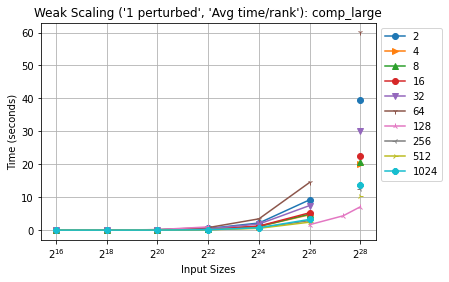

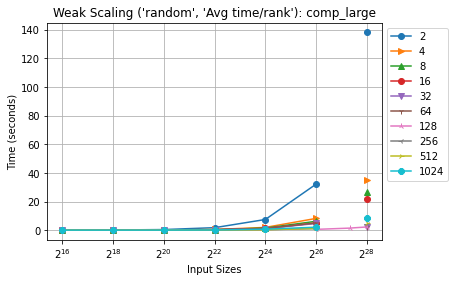

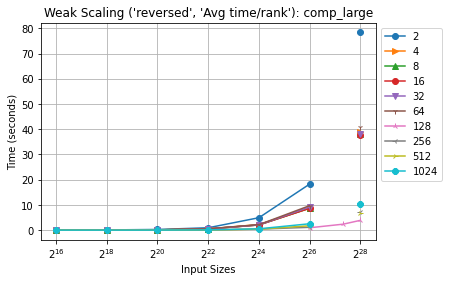

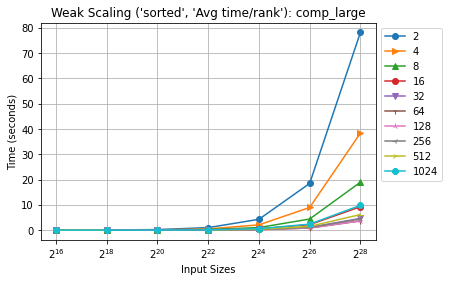

In [24]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comp_large"],
        df1= ctk.dataframe[[threads[1]]].loc["comp_large"],
        df2= ctk.dataframe[[threads[2]]].loc["comp_large"],
        df3= ctk.dataframe[[threads[3]]].loc["comp_large"],
        df4= ctk.dataframe[[threads[4]]].loc["comp_large"],
        df5= ctk.dataframe[[threads[5]]].loc["comp_large"],
        df6= ctk.dataframe[[threads[6]]].loc["comp_large"],
        df7= ctk.dataframe[[threads[7]]].loc["comp_large"],
        df8= ctk.dataframe[[threads[8]]].loc["comp_large"],
        df9= ctk.dataframe[[threads[9]]].loc["comp_large"],
        title=f"Weak Scaling {sorttypes[i]}: comp_large",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

In [25]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

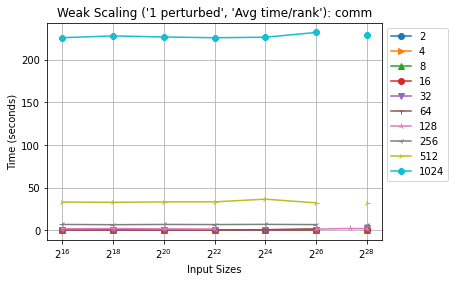

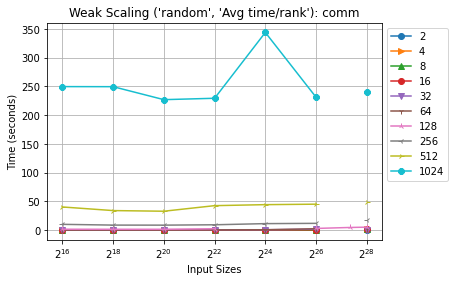

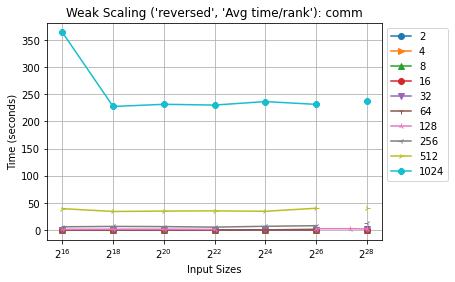

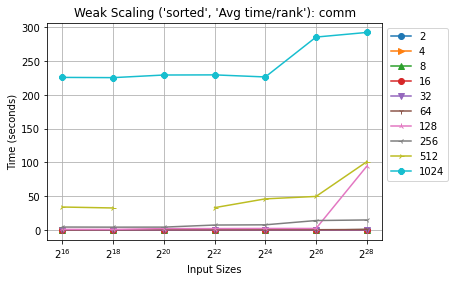

In [26]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comm"],
        df1= ctk.dataframe[[threads[1]]].loc["comm"],
        df2= ctk.dataframe[[threads[2]]].loc["comm"],
        df3= ctk.dataframe[[threads[3]]].loc["comm"],
        df4= ctk.dataframe[[threads[4]]].loc["comm"],
        df5= ctk.dataframe[[threads[5]]].loc["comm"],
        df6= ctk.dataframe[[threads[6]]].loc["comm"],
        df7= ctk.dataframe[[threads[7]]].loc["comm"],
        df8= ctk.dataframe[[threads[8]]].loc["comm"],
        df9= ctk.dataframe[[threads[9]]].loc["comm"],
        title=f"Weak Scaling {sorttypes[i]}: comm",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1